In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures

# We will use the dataset linked at https://www.kaggle.com/jsphyg/weather-dataset-rattle-package. 
#     Since we are at the beginning of machine learning topics, we will not be concerned with NAN values. 
#     The variables we will use are as follows: ‘Location’, ‘MinTemp’, MaxTemp, WindGustDir, WindGustSpeed,
#         WindSpeed9am, WindSpeed3pm, Pressure9am, Pressure3pm.
# You are expected to develop a model that predicts the maximum temperature by using these variables and 
# by using the Multiple Linear, Lasso, Ridge, ElasticNet and Polynomial regressions we have covered so far.

# While performing these operations, cross validation and dummy variables will also be used. The performance
# measurements of the models will be listed in an Excel table and the results will be stated by making an 
# estimation for 1 observation. You can reach the excel table from this link > 
# "https://github.com/pycoders-nl/Class4-Machine_Learning-Week22/blob/main/performance_table.xls" Note:
#     You will see on excel table that >> sheet-1 > Observation, sheet-2> the field which you will fill 
#     into the performance measurements.


In [2]:
df = pd.read_csv("C:\\Users\kbc\Downloads\weatherAUS.csv")
df.sample(5)
df.shape

(145460, 23)

In [3]:
data = df[['Location', 'MinTemp', 'MaxTemp', 'Rainfall','WindGustDir', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 
      'Pressure9am', 'Pressure3pm','Humidity9am','Humidity3pm']].dropna().reset_index().drop(columns=['index'])
data

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Pressure9am,Pressure3pm,Humidity9am,Humidity3pm
0,Albury,13.4,22.9,0.6,W,44.0,20.0,24.0,1007.7,1007.1,71.0,22.0
1,Albury,7.4,25.1,0.0,WNW,44.0,4.0,22.0,1010.6,1007.8,44.0,25.0
2,Albury,12.9,25.7,0.0,WSW,46.0,19.0,26.0,1007.6,1008.7,38.0,30.0
3,Albury,9.2,28.0,0.0,NE,24.0,11.0,9.0,1017.6,1012.8,45.0,16.0
4,Albury,17.5,32.3,1.0,W,41.0,7.0,20.0,1010.8,1006.0,82.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...
120361,Uluru,3.5,21.8,0.0,E,31.0,15.0,13.0,1024.7,1021.2,59.0,27.0
120362,Uluru,2.8,23.4,0.0,E,31.0,13.0,11.0,1024.6,1020.3,51.0,24.0
120363,Uluru,3.6,25.3,0.0,NNW,22.0,13.0,9.0,1023.5,1019.1,56.0,21.0
120364,Uluru,5.4,26.9,0.0,N,37.0,9.0,9.0,1021.0,1016.8,53.0,24.0


In [4]:
data.corr()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Pressure9am,Pressure3pm,Humidity9am,Humidity3pm
MinTemp,1.000000,0.730722,0.110986,0.196310,0.201961,0.174692,-0.452112,-0.462707,-0.245643,0.022310
MaxTemp,0.730722,1.000000,-0.070155,0.088774,0.031529,0.043346,-0.329208,-0.423019,-0.523531,-0.498399
Rainfall,0.110986,-0.070155,1.000000,0.132387,0.089173,0.062333,-0.169714,-0.129392,0.225787,0.256859
WindGustSpeed,0.196310,0.088774,0.132387,1.000000,0.601903,0.689313,-0.458755,-0.414750,-0.219663,-0.035175
WindSpeed9am,0.201961,0.031529,0.089173,0.601903,1.000000,0.513806,-0.230518,-0.179900,-0.269315,-0.029012
WindSpeed3pm,0.174692,0.043346,0.062333,0.689313,0.513806,1.000000,-0.300413,-0.261476,-0.132529,0.032667
Pressure9am,-0.452112,-0.329208,-0.169714,-0.458755,-0.230518,-0.300413,1.000000,0.961613,0.142009,-0.027871
Pressure3pm,-0.462707,-0.423019,-0.129392,-0.414750,-0.179900,-0.261476,0.961613,1.000000,0.189555,0.051186
Humidity9am,-0.245643,-0.523531,0.225787,-0.219663,-0.269315,-0.132529,0.142009,0.189555,1.000000,0.674924
Humidity3pm,0.022310,-0.498399,0.256859,-0.035175,-0.029012,0.032667,-0.027871,0.051186,0.674924,1.000000


it seems that most of the values have very small correlation. Only Pressure9am and Pressure3pm have high 
correlation which is expected. MaxTemp and MinTemp have also medium level correlation. This result is welcomed for a better model. 

<AxesSubplot:>

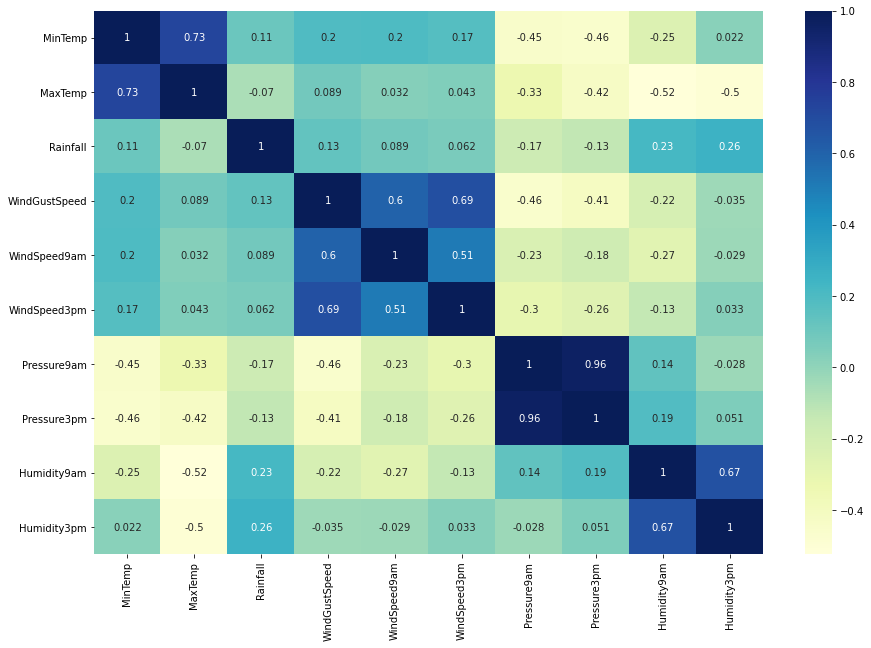

In [5]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')

This heatmap shows better the correlation

<AxesSubplot:>

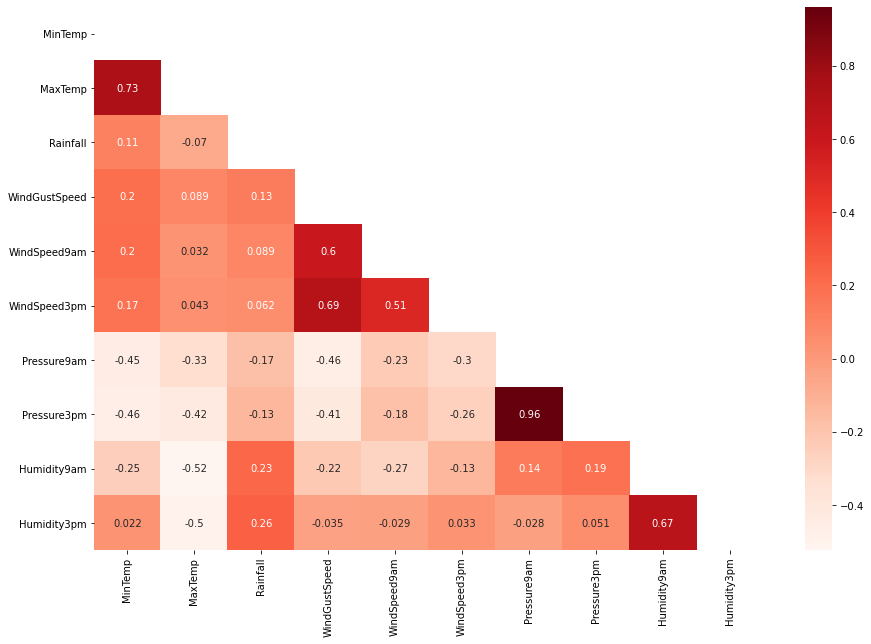

In [6]:
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, mask=mask, cmap='Reds')

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,120366.0,12.389435,6.363118,-8.2,7.8,12.1,17.0,33.9
MaxTemp,120366.0,23.483479,6.983335,2.6,18.1,22.9,28.5,48.1
Rainfall,120366.0,2.327709,8.473447,0.0,0.0,0.0,0.6,367.6
WindGustSpeed,120366.0,40.120840,13.487106,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,120366.0,14.376161,8.805772,0.0,7.0,13.0,20.0,87.0
WindSpeed3pm,120366.0,19.086727,8.678411,0.0,13.0,19.0,24.0,87.0
Pressure9am,120366.0,1017.654834,7.098417,980.5,1013.0,1017.6,1022.4,1041.0
Pressure3pm,120366.0,1015.253068,7.018884,977.1,1010.5,1015.2,1020.0,1039.6
Humidity9am,120366.0,68.298033,19.118671,0.0,56.0,69.0,82.0,100.0
Humidity3pm,120366.0,50.883539,20.690020,0.0,36.0,51.0,65.0,100.0


From this dataframe, it can be infered that Pressure9am and Pressure3pm have a small std and values scatter little. 

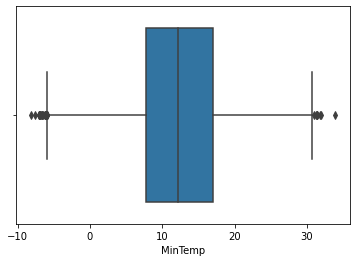

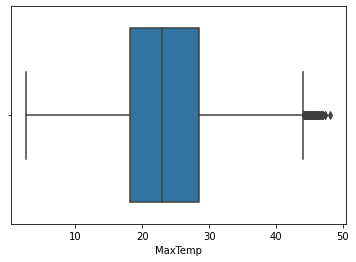

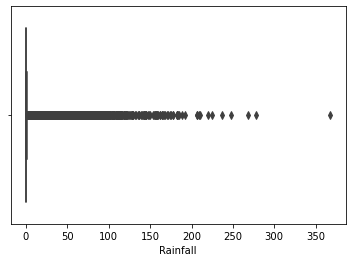

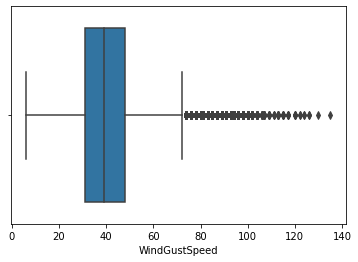

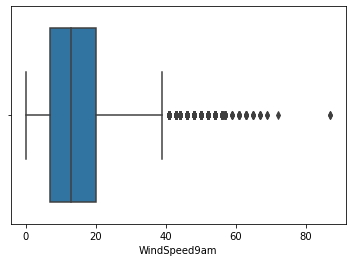

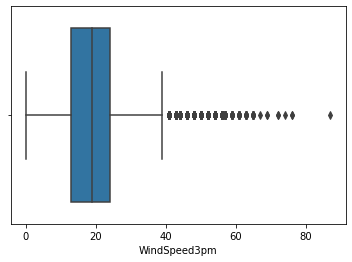

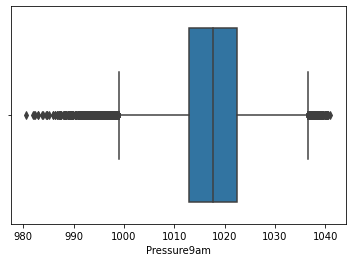

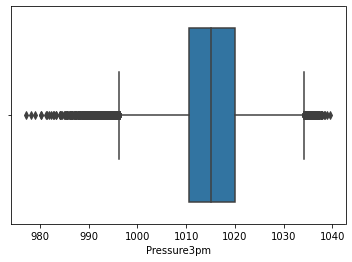

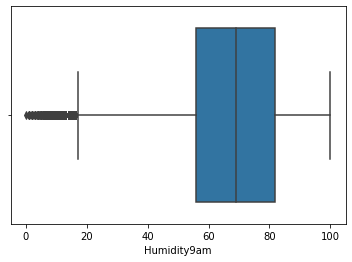

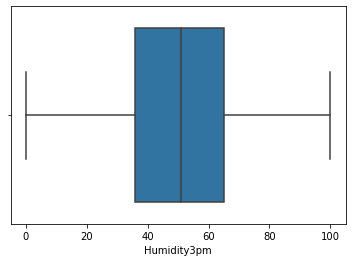

In [8]:
col = list(data.describe())
for i in col:
    ax = plt.figure()
    ax = sns.boxplot(x=i, data=data)


In [9]:
data_dummy= pd.get_dummies(data)
data_dummy.head().T

,0,1,2,3,4
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28.0,32.3
Rainfall,0.6,0.0,0.0,0.0,1.0
WindGustSpeed,44.0,44.0,46.0,24.0,41.0
WindSpeed9am,20.0,4.0,19.0,11.0,7.0
...,...,...,...,...,...
WindGustDir_SSW,0.0,0.0,0.0,0.0,0.0
WindGustDir_SW,0.0,0.0,0.0,0.0,0.0
WindGustDir_W,1.0,0.0,0.0,0.0,1.0
WindGustDir_WNW,0.0,1.0,0.0,0.0,0.0


In [10]:
X = data_dummy.drop(['MaxTemp'], axis=1)
y = data_dummy['MaxTemp']
X


,MinTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Pressure9am,Pressure3pm,Humidity9am,Humidity3pm,Location_Adelaide,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,13.4,0.6,44.0,20.0,24.0,1007.7,1007.1,71.0,22.0,0,...,0,0,0,0,0,0,0,1,0,0
1,7.4,0.0,44.0,4.0,22.0,1010.6,1007.8,44.0,25.0,0,...,0,0,0,0,0,0,0,0,1,0
2,12.9,0.0,46.0,19.0,26.0,1007.6,1008.7,38.0,30.0,0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,0.0,24.0,11.0,9.0,1017.6,1012.8,45.0,16.0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,1.0,41.0,7.0,20.0,1010.8,1006.0,82.0,33.0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120361,3.5,0.0,31.0,15.0,13.0,1024.7,1021.2,59.0,27.0,0,...,0,0,0,0,0,0,0,0,0,0
120362,2.8,0.0,31.0,13.0,11.0,1024.6,1020.3,51.0,24.0,0,...,0,0,0,0,0,0,0,0,0,0
120363,3.6,0.0,22.0,13.0,9.0,1023.5,1019.1,56.0,21.0,0,...,1,0,0,0,0,0,0,0,0,0
120364,5.4,0.0,37.0,9.0,9.0,1021.0,1016.8,53.0,24.0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =50)

In [12]:
print (' Test ve Train veri setlerindeki gözlem sayıları...')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

 Test ve Train veri setlerindeki gözlem sayıları...
X_train:  (96292, 69)
y_train:  (96292,)
X_test:  (24074, 69)
y_test:  (24074,)


In [15]:
X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train, X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                MaxTemp   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     9195.
Date:                Sat, 03 Jul 2021   Prob (F-statistic):               0.00
Time:                        03:18:11   Log-Likelihood:            -2.2750e+05
No. Observations:               96292   AIC:                         4.551e+05
Df Residuals:                   96224   BIC:                         4.558e+05
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        76.2948      1.526     49.990      0.000      73.303      79.286
MinTemp                       0.8227      0.002    417.106      0.000       0.819       0.827
Rainfall                      0.0023      0.001      2.171      0.030       0.000       0.004
WindGustSpeed                 0.0002      0.001      0.221      0.825      -0.002       0.002
WindSpeed9am                 -0.0990      0.001    -74.296      0.000      -0.102      -0.096
WindSpeed3pm                 -0.0095      0.001     -6.632      0.000      -0.012      -0.007
Pressure9am                   0.4784      0.005     90.464      0.000       0.468       0.489
Pressure3pm                  -0.5371      0.005   -102.594      0.000      -0.547      -0.527
Humidity9am                  -0.0332      0.001    -46.304      0.000      -0.035      -0.032
Humidity3pm                  -0.1394      0.001   -212.363      0.000      -0.141      -0.138
Location_Adelaide            -0.2115      0.064     -3.304      0.001      -0.337      -0.086
Location_Albury               2.3337      0.062     37.749      0.000       2.212       2.455
Location_AliceSprings         1.2403      0.063     19.574      0.000       1.116       1.365
Location_BadgerysCreek        2.7742      0.065     42.975      0.000       2.648       2.901
Location_Ballarat             3.2607      0.063     51.534      0.000       3.137       3.385
Location_Bendigo              2.4005      0.062     38.652      0.000       2.279       2.522
Location_Brisbane             0.3775      0.064      5.900      0.000       0.252       0.503
Location_Cairns               1.5128      0.066     22.996      0.000       1.384       1.642
Location_Canberra             2.5926      0.063     41.207      0.000       2.469       2.716
Location_Cobar                0.4296      0.065      6.648      0.000       0.303       0.556
Location_CoffsHarbour         2.0916      0.068     30.736      0.000       1.958       2.225
Location_Dartmoor             3.5763      0.064     55.501      0.000       3.450       3.703
Location_Darwin               0.9978      0.065     15.249      0.000       0.870       1.126
Location_GoldCoast            1.7704      0.068     26.053      0.000       1.637       1.904
Location_Hobart              -0.5540      0.061     -9.068      0.000      -0.674      -0.434
Location_Katherine            3.4007      0.112     30.443      0.000       3.182       3.620
Location_Launceston           1.6638      0.074     22.622      0.000       1.520       1.808
Location_Melbourne            0.2815      0.069      4.069      0.000       0.146       0.417
Location_MelbourneAirport     1.7546      0.064     27.209      0.000       1.628       1.881
Location_Mildura              2.0776      0.063     33.100      0.000      

Acc to this model, the R-squared is above 0.7. This shows that accuracy of the model is in medium level.

In [16]:
# print('Model intercept: ', reg.intercept_)
# print('Model coefficients: ', reg.coef_)

In [ ]:
data1=data.copy()
datadummy= pd.get_dummies(data)


In [ ]:
# Sklearn model

X = data_dummy.drop(['MaxTemp'], axis=1)
y = data_dummy['MaxTemp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)
model = LinearRegression().fit(X_train, y_train)

In [19]:
# train
print('train r2',model.score(X_train, y_train))
print('train rmse',np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
print('*'*20)
# test
print('test r2',model.score(X_test, y_test))
print('test rmse',np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
print('*'*20)
#cross
print('r2 crossvalid',cross_val_score(model, X_train, y_train, cv = 10, scoring = 'r2').mean())
print('mean squaroot error-crossvalid',np.sqrt(-cross_val_score(estimator=model, X=X_test, y=y_test, scoring = "neg_mean_squared_error", cv=10)).mean())

train r2 0.8643181717078526
train rmse 2.5727901587976962
********************
test r2 0.8639331201339033
test rmse 2.5739921283038982
********************
r2 crossvalid 0.8640808837676973
mean squaroot error-crossvalid 2.575551926867603


# Ridge Regression

In [20]:
ridge_model=Ridge()
ridge_model.fit(X_train, y_train)
# y_pred=ridge_model.predict(X_test)
# y_pred_train=ridge_model.predict(X_train)
alpha_space = np.linspace(5,0.01,50)
Ridge(alpha_space)
alphaCV = RidgeCV(alphas = alpha_space, 
                  scoring = 'neg_mean_squared_error',
                  normalize = True)

In [21]:
alphaCV.fit(X_train, y_train)

RidgeCV(alphas=array([5.        , 4.89816327, 4.79632653, 4.6944898 , 4.59265306,
       4.49081633, 4.38897959, 4.28714286, 4.18530612, 4.08346939,
       3.98163265, 3.87979592, 3.77795918, 3.67612245, 3.57428571,
       3.47244898, 3.37061224, 3.26877551, 3.16693878, 3.06510204,
       2.96326531, 2.86142857, 2.75959184, 2.6577551 , 2.55591837,
       2.45408163, 2.3522449 , 2.25040816, 2.14857143, 2.04673469,
       1.94489796, 1.84306122, 1.74122449, 1.63938776, 1.53755102,
       1.43571429, 1.33387755, 1.23204082, 1.13020408, 1.02836735,
       0.92653061, 0.82469388, 0.72285714, 0.62102041, 0.51918367,
       0.41734694, 0.3155102 , 0.21367347, 0.11183673, 0.01      ]),
        normalize=True, scoring='neg_mean_squared_error')

In [22]:
alphaCV.alpha_

0.01

In [23]:
ridge_model = Ridge(0.001, normalize=True)
ridge_model.fit(X_train, y_train)


Ridge(alpha=0.001, normalize=True)

In [24]:
# train
print('train r2',ridge_model.score(X_train, y_train))
print('train rmse',np.sqrt(mean_squared_error(y_train, ridge_model.predict(X_train))))
print('*'*20)
# test
print('test r2',ridge_model.score(X_test, y_test))
print('test rmse',np.sqrt(mean_squared_error(y_test, ridge_model.predict(X_test))))
print('*'*20)
#cross
print('r2 crossvalid',cross_val_score(ridge_model, X_train, y_train, cv = 10, scoring = 'r2').mean())
print('mean squaroot error-crossvalid',np.sqrt(-cross_val_score(estimator=ridge_model, X=X_test, y=y_test, scoring = "neg_mean_squared_error", cv=10)).mean())

train r2 0.8642975714920882
train rmse 2.5729854613724545
********************
test r2 0.8638760839709501
test rmse 2.5745315514644527
********************
r2 crossvalid 0.8640603165915695
mean squaroot error-crossvalid 2.575748091686573


# Lasso

In [25]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
alpha_space = np.linspace(0.01, 20, 100)
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5).fit(X_train, y_train)
lasso_cv_model.alpha_


0.01

In [26]:
lasso_model = Lasso(0.01).fit(X_train, y_train)


In [27]:
# train
print('train r2',lasso_model.score(X_train, y_train))
print('train rmse',np.sqrt(mean_squared_error(y_train, lasso_model.predict(X_train))))
print('*'*20)
# test
print('test r2',lasso_model.score(X_test, y_test))
print('test rmse',np.sqrt(mean_squared_error(y_test, lasso_model.predict(X_test))))
print('*'*20)
#cross
print('r2 crossvalid',cross_val_score(lasso_model, X_train, y_train, cv = 10, scoring = 'r2').mean())
print('mean squaroot error-crossvalid',np.sqrt(-cross_val_score(estimator=lasso_model, X=X_test, y=y_test, scoring = "neg_mean_squared_error", cv=10)).mean())

train r2 0.8604112256676084
train rmse 2.6095689081747175
********************
test r2 0.8604015313059827
test rmse 2.6071818766185704
********************
r2 crossvalid 0.8602407428905317
mean squaroot error-crossvalid 2.6098359714584776


# Elastic

In [28]:
elastic_model = ElasticNetCV(alphas=alpha_space, l1_ratio=0.5)
elastic_model.fit(X_train,y_train)
elastic_model.l1_ratio_


0.5

In [29]:
elastic_model.alpha_


0.01

In [30]:
# train
print('train r2',elastic_model.score(X_train, y_train))
print('train rmse',np.sqrt(mean_squared_error(y_train, elastic_model.predict(X_train))))
print('*'*20)
# test
print('test r2',elastic_model.score(X_test, y_test))
print('test rmse',np.sqrt(mean_squared_error(y_test, elastic_model.predict(X_test))))
print('*'*20)
#cross
print('r2 crossvalid',cross_val_score(elastic_model, X_train, y_train, cv = 10, scoring = 'r2').mean())
print('mean squaroot error-crossvalid',np.sqrt(-cross_val_score(estimator=elastic_model, X=X_test, y=y_test, scoring = "neg_mean_squared_error", cv=10)).mean())

train r2 0.8613438358619245
train rmse 2.6008368693834636
********************
test r2 0.8614082102067673
test rmse 2.5977643529230794
********************
r2 crossvalid 0.8611734109467107
mean squaroot error-crossvalid 2.600974809028204


# Polynomial Regression

In [31]:
poly = PolynomialFeatures(2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
pol_model = LinearRegression()
pol_model.fit(X_poly_train,y_train)
y_pred=pol_model.predict(X_poly_test)
y_pred_train=pol_model.predict(X_poly_train)

In [ ]:
poly = PolynomialFeatures(2)
X_train = poly.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train, y_train)
poly_model.score(X_train, y_train)
X_test = poly.fit_transform(X_test)
poly_model.score(X_test, y_test)
poly_model.score(X_train, y_train)
np.sqrt(mean_squared_error(y_train,poly_model.predict(X_train))) , np.sqrt(mean_squared_error(y_test,poly_model.predict(X_test)))
cross_val_score(poly_model, X_train, y_train, cv = 10, scoring = 'r2').mean()

In [ ]:
# train
print('train r2',pol_model.score(X_train, y_train))
print('train rmse',np.sqrt(mean_squared_error(y_train, pol_model.predict(X_train))))
print('*'*20)
# test
print('test r2',elastic_model.score(X_test, y_test))
print('test rmse',np.sqrt(mean_squared_error(y_test, pol_model.predict(X_test))))
print('*'*20)
#cross
print('r2 crossvalid',cross_val_score(pol_model, X_train, y_train, cv = 10, scoring = 'r2').mean())
print('mean squaroot error-crossvalid',np.sqrt(-cross_val_score(estimator=pol_model, X=X_test, y=y_test, scoring = "neg_mean_squared_error", cv=10)).mean())